# **Scooping Into Ben & Jerry's: An Analysis of Ice Cream Data**

# Introduction

Hello fellow ice cream enthusiasts! Today, we're diving into a dataset of Ben & Jerry's ice cream purchases to explore pricing, flavors, and consumer demographics. We'll use Python and some data analysis techniques to uncover interesting insights.

# Loading The Data

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


ice_cream = pd.read_csv('https://bcdanl.github.io/data/ben-and-jerry-cleaned.csv')


print(ice_cream.head())

   priceper1       flavor_descr size1_descr  household_id  household_income  \
0       3.41        CAKE BATTER   16.0 MLOZ       2001456            130000   
1       3.50  VAN CARAMEL FUDGE   16.0 MLOZ       2001456            130000   
2       3.50  VAN CARAMEL FUDGE   16.0 MLOZ       2001456            130000   
3       3.00          W-N-C-P-C   16.0 MLOZ       2001637             70000   
4       3.99    AMERICONE DREAM   16.0 MLOZ       2002791            130000   

   household_size  usecoup  couponper1   region  married   race  \
0               2     True         0.5  Central    False  white   
1               2    False         0.0  Central    False  white   
2               2    False         0.0  Central    False  white   
3               1    False         0.0     West    False  white   
4               3    False         0.0    South     True  white   

   hispanic_origin  microwave  dishwasher    sfh  internet tvcable  
0            False       True       False  False     

# Descriptive Statistics:

In [5]:

print(ice_cream.info())
print(ice_cream.describe(include='all'))
print(ice_cream['priceper1'].mean())
print(ice_cream['flavor_descr'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21974 entries, 0 to 21973
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   priceper1         21974 non-null  float64
 1   flavor_descr      21974 non-null  object 
 2   size1_descr       21974 non-null  object 
 3   household_id      21974 non-null  int64  
 4   household_income  21974 non-null  int64  
 5   household_size    21974 non-null  int64  
 6   usecoup           21974 non-null  bool   
 7   couponper1        21974 non-null  float64
 8   region            21974 non-null  object 
 9   married           21974 non-null  bool   
 10  race              21974 non-null  object 
 11  hispanic_origin   21974 non-null  bool   
 12  microwave         21974 non-null  bool   
 13  dishwasher        21974 non-null  bool   
 14  sfh               21974 non-null  bool   
 15  internet          21974 non-null  bool   
 16  tvcable           21940 non-null  object

- The mean price per serving is approximately $3.31.
- There are 50 unique flavors of Ben & Jerry's Ice Cream in this Data Frame

# Counting

In [9]:
print(ice_cream['flavor_descr'].value_counts().head(10))

flavor_descr
CHERRY GRCA                   2097
CHC FUDGE BROWNIE             1235
CHC CHIP C-DH                 1070
HEATH COFFEE CRUNCH           1070
CHUNKY MONKEY                 1064
PHISH FOOD                     968
NEW YORK SUPER FUDGE CHUNK     932
AMERICONE DREAM                865
PB CUP                         828
KARAMEL SUTRA                  738
Name: count, dtype: int64


- This shows the top 10 flavors purchased.

In [10]:

print(ice_cream['race'].value_counts())


print(ice_cream['household_income'].value_counts())


print(ice_cream['household_size'].value_counts())

race
white    18968
black     1522
other      887
asian      597
Name: count, dtype: int64
household_income
80000     4758
70000     2727
110000    2337
130000    2199
180000    1265
160000    1208
170000    1198
190000    1132
210000    1021
150000    1018
60000      681
50000      616
230000     504
40000      466
260000     271
240000     256
280000     117
300000     104
310000      96
Name: count, dtype: int64
household_size
2    8472
1    5273
3    3775
4    2883
5    1040
6     282
9     110
7      91
8      48
Name: count, dtype: int64


- This shows the breakdown of demographic informations such as race, household income, and household size.

# Filtering and Grouping

In [11]:
income_flavor_counts = ice_cream.groupby(['household_income', 'flavor_descr']).size().reset_index(name='counts')
top_flavors_by_income = income_flavor_counts.sort_values(by=['household_income', 'counts'], ascending=[True, False]).groupby('household_income').head(3)
print(top_flavors_by_income)

     household_income                flavor_descr  counts
9               40000                 CHERRY GRCA      47
11              40000               CHUNKY MONKEY      36
7               40000               CHC CHIP C-DH      34
54              50000                 CHERRY GRCA      56
56              50000               CHUNKY MONKEY      46
52              50000               CHC CHIP C-DH      44
96              60000                 CHERRY GRCA     105
88              60000             AMERICONE DREAM      33
113             60000  NEW YORK SUPER FUDGE CHUNK      30
140             70000                 CHERRY GRCA     226
138             70000               CHC CHIP C-DH     163
150             70000         HEATH COFFEE CRUNCH     143
186             80000                 CHERRY GRCA     417
197             80000         HEATH COFFEE CRUNCH     264
184             80000               CHC CHIP C-DH     239
234            110000                 CHERRY GRCA     239
233           

- This code shows the top 3 flavors purchased by each income bracket, revelaing potential income based preferences.

In [12]:
coupon_price_diff = ice_cream.groupby('usecoup')['priceper1'].agg(['mean', 'std'])
print(coupon_price_diff)

             mean       std
usecoup                    
False    3.307155  0.649671
True     3.377174  0.783962


- This shows the average price and standard deviation for purchases made with and without coupons, indicating potential price sensitivity.

In [13]:
regional_flavor_counts = ice_cream.groupby(['region', 'flavor_descr']).size().reset_index(name='counts')
top_flavors_by_region = regional_flavor_counts.sort_values(by=['region', 'counts'], ascending=[True, False]).groupby('region').head(3)
print(top_flavors_by_region)

      region         flavor_descr  counts
10   Central          CHERRY GRCA     403
9    Central    CHC FUDGE BROWNIE     297
12   Central        CHUNKY MONKEY     261
58      East          CHERRY GRCA     405
80      East           PHISH FOOD     267
68      East  HEATH COFFEE CRUNCH     241
104    South          CHERRY GRCA     693
103    South    CHC FUDGE BROWNIE     496
106    South        CHUNKY MONKEY     368
152     West          CHERRY GRCA     596
150     West        CHC CHIP C-DH     322
162     West  HEATH COFFEE CRUNCH     315


- This reveals the top 3 flavors purcahsed in each region

# Visualiations

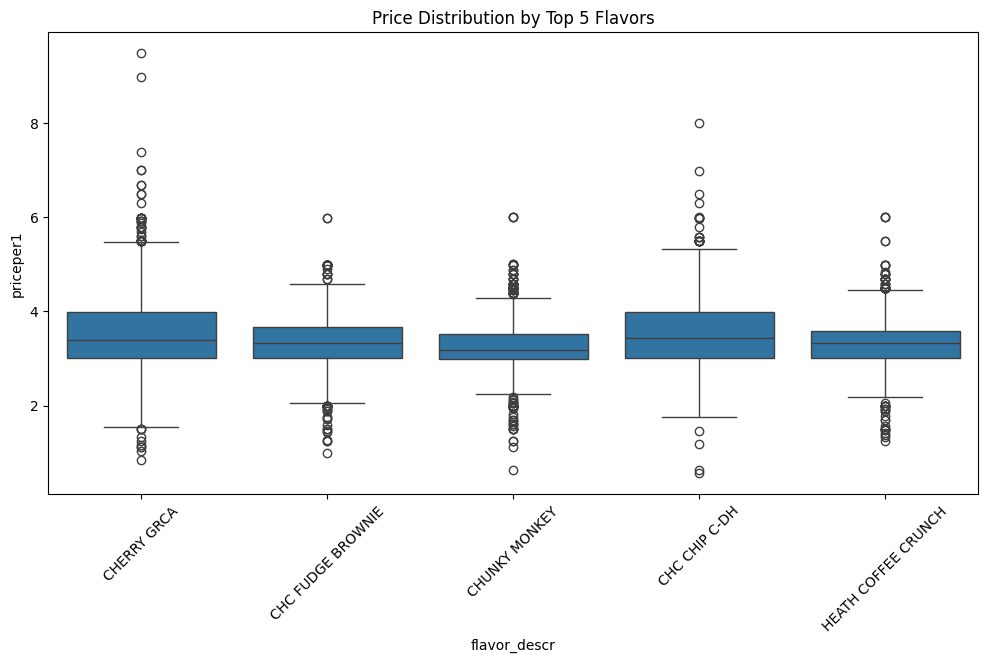

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


top_flavors = ice_cream['flavor_descr'].value_counts().nlargest(5).index

top_flavors_df = ice_cream[ice_cream['flavor_descr'].isin(top_flavors)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='flavor_descr', y='priceper1', data=top_flavors_df)
plt.title('Price Distribution by Top 5 Flavors')
plt.xticks(rotation=45)
plt.show()

- This visualization will show the distribution of prices for the top 5 most popular flavors, helping us understand if certain flavors tend to be priced higher or lower.



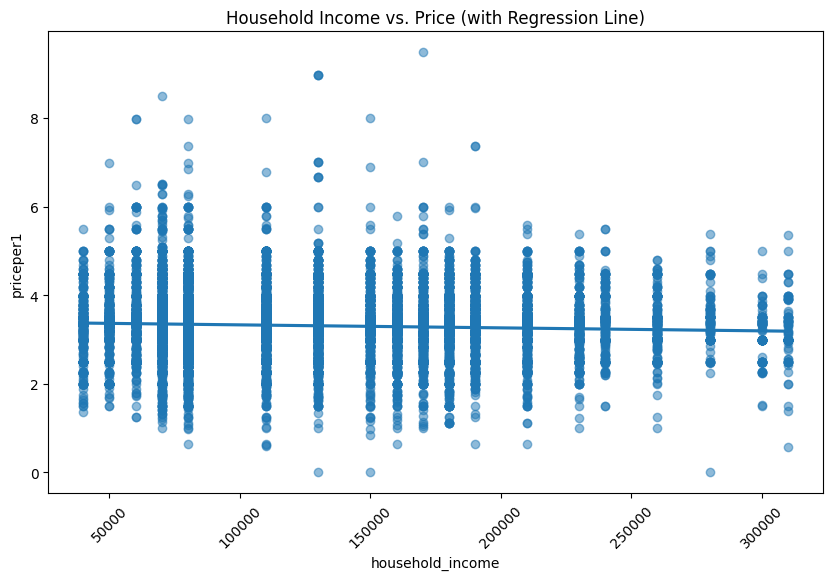

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='household_income', y='priceper1', data=ice_cream, scatter_kws={'alpha': 0.5})
plt.title('Household Income vs. Price (with Regression Line)')
plt.xticks(rotation=45)
plt.show()

- This visualization will show the relationship between household income and the price of ice cream, with a regression line to indicate the trend.



# Linear Regression

In [20]:

X = ice_cream[['household_income', 'household_size']].fillna(0) # Filling na values with 0.
y = ice_cream['priceper1']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


MSE: 0.4228710318984661
R-squared: 0.004728162675762815


- The very low R-squared value suggests that your linear regression model is a poor fit for the data.
- Household income and household size, as used in this model, are not strong predictors of the price of Ben & Jerry's ice cream.
- Other factors, not included in your model, are likely to have a much stronger influence on price.
- This model is not useful for predicting the price of the ice cream.